In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA as sklearnPCA
from sklearn.cluster import KMeans


(15, 5)
                                            file_name    tempo  \
0   21 Savage, Offset, Metro Boomin - Ric Flair Dr...   99.384   
1   6LACK - Pretty Little Fears ft. J. Cole (Offic...  129.199   
2   Abacus ft. Cimone - Everybody's Got To Learn S...  103.359   
3           Arizona Zervas - Zone (ft. John Wolf).mp3  135.999   
4   Bachman Turner Overdrive - You Ain't Seen Noth...  117.454   
5       Barely Alive - Warrior (ft. Mad Hed City).mp3   86.133   
6                          bassnectar - bass head.mp3  172.266   
7   bassnectar - cozza frenzy ( mega bass remix ).mp3  135.999   
8   Bassnectar - Magical World feat. Nelly Furtado...  135.999   
9          bassnectar - underwater ft. tina malia.mp3  135.999   
10      benny benassi - cinema ( skrillex remix ).mp3  143.555   
11      Bensley - Do It Again (ft. Armanni Reign).mp3  117.454   
12                     Bert H & Edlan - Intercept.mp3  117.454   
13                       Big L.C.T. - Trendsetter.mp3  143.555   
14

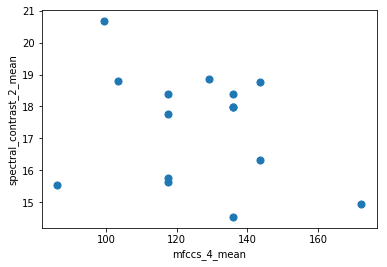

In [15]:
df = pd.read_csv("df_features.csv")

print(df.shape)
print(df)

df_np = np.array(df)

print(df_np[0][1])
plt.scatter(df_np[:,1],df_np[:,2], s=50)

plt.ylabel("spectral_contrast_2_mean")
plt.xlabel("mfccs_4_mean")

plt.savefig("2dTest.png", dpi=200)
plt.show()

In [16]:
# Liednamen aus dem Array entfernen
feature_array = np.delete(df_np, 0, 1)

# Die Features umskalieren, um Werte zwischen 0 und 1 zu bekommen [0,1]
X_norm = (feature_array - feature_array.min())/(feature_array.max() - feature_array.min())


(15, 4)
[[0.83155848 0.18684156 0.13050601 0.23042306]
 [0.63244245 0.20919224 0.1423709  0.35576006]
 [0.71582331 0.20224492 0.14114994 0.33653567]
 [0.83155848 0.20316    0.11863853 0.3146179 ]
 [1.         0.18432186 0.17260473 0.32918913]
 [0.81197117 0.20003111 0.         0.3002696 ]
 [0.71582331 0.19899419 0.12687681 0.20173165]
 [0.79434363 0.20242379 0.11741757 0.38015087]
 [0.55343737 0.18738594 0.11318436 0.32612505]
 [0.71582331 0.18829324 0.13761665 0.26988024]]
[1 7 1 7 6 8 4 0 3 5 0 9 2 3 9]
coordinate:  [0.6221381169639154 0.21409166321028616 0.14981854002488593
 0.32214848610535046] label:  1 song:  21 Savage, Offset, Metro Boomin - Ric Flair Drip.mp3
coordinate:  [0.7767160929075072 0.20472832849440067 0.12522293654085442
 0.37215885524678555] label:  7 song:  6LACK - Pretty Little Fears ft. J. Cole (Official Music Video).mp3
coordinate:  [0.6427467855661552 0.2042928245541269 0.13492326835338034
 0.38937163002903363] label:  1 song:  Abacus ft. Cimone - Everybody's Go

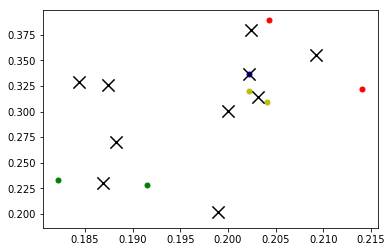

In [23]:
# 
print(X_norm.shape)
kmeans = KMeans(n_clusters = 10, random_state = 0)
kmeans.fit(X_norm)

centroids = kmeans.cluster_centers_
labels = kmeans.labels_

print(centroids)
print(labels)

colors = ["g.","r.","b.","y.", "#4286f4", "#20267c", "#961c92", "#a00e6d", "#3faf07", "#91ce16", "#adaa0d"]

for i in range(len(X_norm)):
    print("coordinate: ", X_norm[i], "label: ", labels[i], "song: ", df_np[i][0])
    plt.plot(X_norm[i][1],X_norm[i][3], colors[labels[i]], markersize = 10)

plt.scatter(centroids[:,1], centroids[:,3], color = "black", marker = "x", s=150, linewidths = 5, zorder = 10)
plt.show()

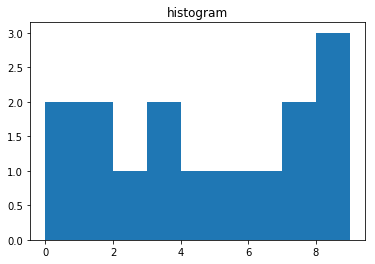

In [24]:
# Wie viele Lieder gehören jeder Gruppe zu
a = np.array(labels) 
plt.hist(a, bins = [0,1,2,3,4,5,6,7,8,9]) 
plt.title("histogram") 
plt.show()